In [1]:
import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
%matplotlib inline
sc.settings.verbosity = 0




/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: 

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig5"
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18),
                              vector_friendly=True
                             )

# scRNA

In [3]:
9

9

In [4]:
# #FILE_NAME = "adata_scrna_v3.h5ad.final"
# FILE_NAME = "adata_scrna_freeze.h5ad"
# PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
# # adata.write(f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}')
# adata=sc.read_h5ad(PATH2)
# # try:
# #     adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_scrna_v1.h5ad.final')
# # except:
# #     import scanpy as sc
# #     adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_scrna_v1.h5ad.final')

# adata.obs["lvl5_annotation_new"]=adata.obs["lvl4_annotation"]

# # #adata=adata[adata.obs["tech"]!="xenium"]
# # adata

# adata

 

In [5]:
# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# #%matplotlib inline
# sc.settings.figdir = "fig6"
# sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [6]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata=sc.read_h5ad(PATH)
adata_5k=adata[adata.obs["tech"]=="xenium"].copy()
del(adata)
import gc
gc.collect()


def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST



# adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["lvl5_annotation"]
# adata_5k

adata_5k.obs["niche19"].value_counts()

niche19
Small_BV                    292507
Papillary_dermis            180739
Epidermis_basal             147213
Epidermis_mid               133572
Epidermis_late              109007
Reticular_dermis             83279
Tzone-like                   73950
EpidermisInflamm_mid         72774
Sweat_gland                  46573
Sweat_gland_channel          44440
Muscle                       40225
Sebaceous_duct               33977
Large_BV                     27079
Reticular_dermis_LE_rich     26098
Perineural                   20405
HF_outer                     19947
Hypodermis                   15600
VenuleMuscle                 14906
Sebaceous_gland              13163
Epidermis_basal_cycling      10415
EpidermisInflamm_late         4396
Sebaceous_immune              3459
HF_inner                      2424
Nonspecific/folded            1310
Epidermis_APChi                664
Plasma_cell_rich               565
HF_innermost                   119
Name: count, dtype: int64

In [7]:
# import pickle
# VARIABLE_TO_DUMP='niche19'
# md=adata_5k.obs[VARIABLE_TO_DUMP].to_dict()
# out_path = f"/lustre/scratch124/cellgen/haniffa/users/ls34/dicts/{VARIABLE_TO_DUMP}.pkl"
# with open(out_path, "wb") as f:
#     pickle.dump(md, f)
# out_path

# CHECK NORMALIZATION

In [8]:
# adata.X[:20,:20].todense()

In [9]:
# adata_5k.X[:30,:30].todense()

In [10]:
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)



In [11]:
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [12]:
1

1

In [13]:
# CATEGORY="lvl4_annotation"

# try:
#     adata.obs["lvl3_annotation_patient_status"] = adata.obs[CATEGORY].astype(str) + "__" +  adata.obs["Patient_status2"].astype(str)
#     #CATEGORY="lvl3_annotation_patient_status"
#     adata.obs["lvl3_annotation_patient_status"].value_counts()
# except:
#     1

In [14]:
# SEB_CCC_GENES = [
#     "TNFSF12", "TNFRSF12A", "TNFSF10", "TNFRSF10A", "FASLG", "FAS",
#     "CXCL16", "CXCR6",  "CCL19", "CCR7", "ALCAM", "CD6"
# ]
# # sc.pl.dotplotadata, 
#               SEB_CCC_GENES,
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#             standard_scale="var",
#               #vmax=1,
#              # colorbar_title="Mean expression\n(VARIANCE SCALED)",
#               swap_axes=True
#           #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )
# sc.pl.dotplot(adata_5k, 
#               SEB_CCC_GENES,
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#             standard_scale="var",
#               #vmax=1,
#              # colorbar_title="Mean expression\n(VARIANCE SCALED)",
#               swap_axes=True
#           #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )

In [15]:
# SEB_DEGS = ["CFB", "CCL1", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
#      "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"]
 
# sc.pl.dotplot(adata[adata.obs["Patient_status"]=="AD"], 
#               SEB_DEGS,
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#             standard_scale="var",
#               #vmax=1,
#              # colorbar_title="Mean expression\n(VARIANCE SCALED)",
#               swap_axes=True
#           #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )
# sc.pl.dotplot(adata_5k, 
#               remove_markers(SEB_DEGS),
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#             standard_scale="var",
#               #vmax=1,
#              # colorbar_title="Mean expression\n(VARIANCE SCALED)",
#               swap_axes=True
#           #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )

# AD gwas

In [16]:
MIN_SCORE=0.05
print(MIN_SCORE)
VMAX_PLOTS = 0.8
SPOT_SIZE=50

USE_TOPN=True
TOPN=100

0.05


In [17]:
adata_5k_i=adata_5k[adata_5k.obs["disease_overall"]=="AD"]

In [18]:
import pandas as pd

# Load the TSV file
df = pd.read_csv("ot_ad.tsv", sep="\t")

# Filter out rows where globalScore < 0.8
df_filtered = df[df["globalScore"] >= MIN_SCORE]

# (Optional) save to new file
#df_filtered.to_csv("ot_ad.tsv", sep="\t", index=False)
df_filtered.shape

AD_GENES_OT = df_filtered["symbol"].to_list()
len(remove_markers(AD_GENES_OT))

if USE_TOPN:
    df_filtered=df[df["globalScore"] >= 0.01]
    AD_GENES_OT = df_filtered["symbol"].to_list()
    AD_GENES_OT = AD_GENES_OT[:TOPN]

In [19]:
# adata_5k_i=adata_5k_i[~adata_5k_i.obs["niche19"].isna()]

In [20]:
adata_5k_i=adata_5k_i[adata_5k_i.obs["niche19"]!="Nonspecific/folded"]
adata_5k_i=adata_5k_i[~adata_5k_i.obs["niche19"].isna()]
adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status"]=="Lesional"]



# Get counts per niche
counts = adata_5k_ii.obs["niche19"].value_counts()

# Identify categories with at least 10 cells
valid_niches = counts[counts > 10].index

# Subset AnnData to only those categories
adata_5k_ii = adata_5k_ii[adata_5k_ii.obs["niche19"].isin(valid_niches)].copy()
adata_5k_ii.obs["niche19"].value_counts()

niche19
Small_BV                    28287
Epidermis_mid               25484
Papillary_dermis            24589
Epidermis_basal             16173
Epidermis_late              15554
Tzone-like                  13857
EpidermisInflamm_mid         7486
Reticular_dermis             6564
Sweat_gland_channel          5277
Sweat_gland                  4547
Epidermis_basal_cycling      4061
Sebaceous_duct               4044
Muscle                       3868
Reticular_dermis_LE_rich     2398
Large_BV                     2302
Sebaceous_immune             1576
Perineural                   1011
HF_outer                      844
Hypodermis                    796
Epidermis_APChi               512
EpidermisInflamm_late         272
Sebaceous_gland               146
Plasma_cell_rich              117
VenuleMuscle                   40
HF_inner                       16
Name: count, dtype: int64

In [21]:
9

9

In [22]:
desired_order = [
    'Sebaceous_immune', 
    'Plasma_cell_niche','Plasma_cell_rich',
    'Tzone-like',
    'Epidermis_APChi',
    'EpidermisInflamm_late',
'EpidermisInflamm_mid',
    'Epidermis_basal_cycling',





     'Epidermis_late',
    'Epidermis_mid',
    'Epidermis_basal', #'Epidermis_mid1',
    'Papillary_dermis',
    'Small_BV', 'Large_BV','VenuleMuscle',
    'Reticular_dermis', 'Reticular_dermis_LErich','Reticular_dermis_LE_rich',
    'Muscle', 'Perineural',
    'Sebaceous_gland','Sebaceous_duct',
    'Sweat_gland', 'Sweat_gland_channel',
    'HF', 'OuterHF','HF_outer','HF_inner','HF_innermost',
    'Perifollicular_VE', 'Hypodermis'
]

count=0
for x in adata_5k_ii.obs["niche19"].unique():
    if x not in desired_order:
        print(x)
        count += 1
if count != 0: 
    stop
adata_5k_ii.obs["niche19"].value_counts()

niche19
Small_BV                    28287
Epidermis_mid               25484
Papillary_dermis            24589
Epidermis_basal             16173
Epidermis_late              15554
Tzone-like                  13857
EpidermisInflamm_mid         7486
Reticular_dermis             6564
Sweat_gland_channel          5277
Sweat_gland                  4547
Epidermis_basal_cycling      4061
Sebaceous_duct               4044
Muscle                       3868
Reticular_dermis_LE_rich     2398
Large_BV                     2302
Sebaceous_immune             1576
Perineural                   1011
HF_outer                      844
Hypodermis                    796
Epidermis_APChi               512
EpidermisInflamm_late         272
Sebaceous_gland               146
Plasma_cell_rich              117
VenuleMuscle                   40
HF_inner                       16
Name: count, dtype: int64

In [23]:
# make sure niche12 is categorical and ordered
adata_5k_ii.obs["niche19"] = pd.Categorical(
    adata_5k_ii.obs["niche19"],
    categories=desired_order,
    ordered=True
)

In [24]:
# Get counts per niche
counts = adata_5k_ii.obs["niche19"].value_counts()

# Identify categories with at least 10 cells
valid_niches = counts[counts > 10].index

# Subset AnnData to only those categories
adata_5k_ii = adata_5k_ii[adata_5k_ii.obs["niche19"].isin(valid_niches)].copy()
adata_5k_ii.obs["niche19"].value_counts()

niche19
Small_BV                    28287
Epidermis_mid               25484
Papillary_dermis            24589
Epidermis_basal             16173
Epidermis_late              15554
Tzone-like                  13857
EpidermisInflamm_mid         7486
Reticular_dermis             6564
Sweat_gland_channel          5277
Sweat_gland                  4547
Epidermis_basal_cycling      4061
Sebaceous_duct               4044
Muscle                       3868
Reticular_dermis_LE_rich     2398
Large_BV                     2302
Sebaceous_immune             1576
Perineural                   1011
HF_outer                      844
Hypodermis                    796
Epidermis_APChi               512
EpidermisInflamm_late         272
Sebaceous_gland               146
Plasma_cell_rich              117
VenuleMuscle                   40
HF_inner                       16
Name: count, dtype: int64

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:731: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  

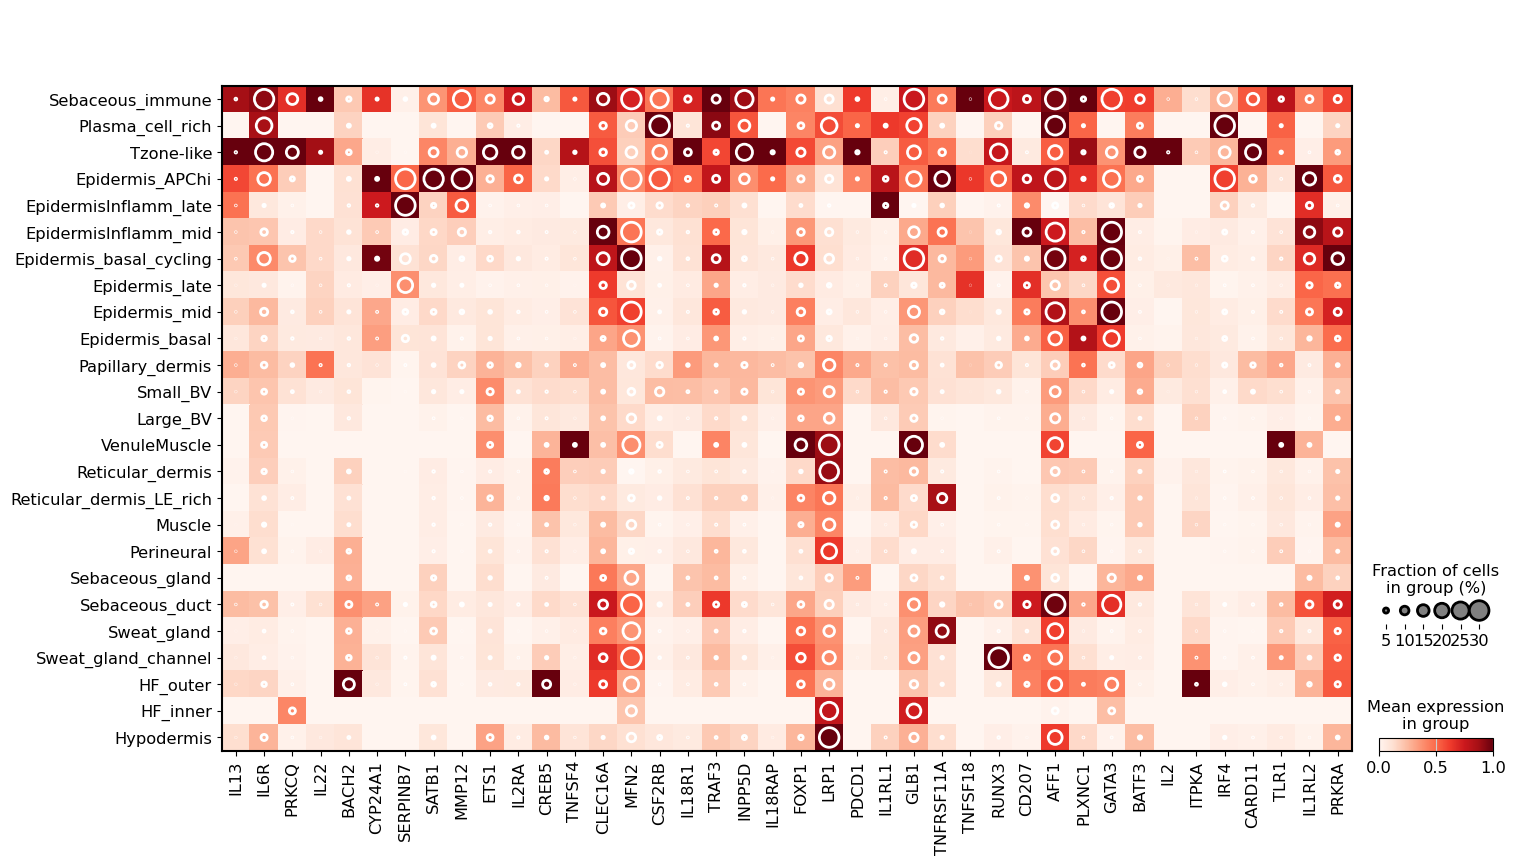

In [25]:
# for x in adata_5k_i.obs["Site_status"].unique():
#     if x=="Lesional":
#         print(x)
#         adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status"]==x]
#        # sc.pl.dotplot(
#     #     adata_5k_i,
#     #     remove_markers(AD_genes),
#     #     groupby="niche12",
#     #     standard_scale="var",
#     #     dendrogram=False,
#     #     dot_max=0.3
#     #         # categories_order=ORDER,

#     #     #vmax=1,
#     # #     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#     # #  'KC_Sebocyte_PPARG+_basal/outer',
#     # #  'KC_Sebocyte_PPARG+_basal_cycling',
#     # # ]
#     # ) 


dp = sc.pl.DotPlot(
            adata_5k_ii,
            remove_markers(AD_GENES_OT)[:40],
            #swap_axes=True,
            groupby="niche19",
           vmax=1,
            #    colorbar_title='Mean expression\n(variance scaled)', 
         standard_scale="var",
           # save="5g_AD.pdf",
        ) 
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
                       dot_max=.3

                  )
dp.show()
#dp.savefig("fig5/suppfig9a_spatial_gwas_ad.pdf", dpi=300)       
    

In [26]:
# for x in adata_5k_i.obs["Site_status"].unique():
#     if x=="Week 12":
#         print(x)
#         adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status"]==x]
    

#         dp = sc.pl.DotPlot(
#                     adata_5k_ii,
#                     remove_markers(AD_genes),
#                     #swap_axes=True,
#                     groupby="niche19",
#                    vmax=1,
#                     #    colorbar_title='Mean expression\n(variance scaled)', 
#                  standard_scale="var",
#                    # save="5g_AD.pdf",
#                 ) 
#         dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                                dot_max=.3

#                           )
#         dp.show()
# #dp.savefig("fig5/spatial_gwas_ad.pdf", dpi=300)       
    

In [27]:
adata_5k_ii.obs["Site_status"].unique()

['Lesional']
Categories (1, object): ['Lesional']

In [28]:
KEEP = ['Lesional', 'Week 12', '3D_Lesional_baseline', '3D_Week12']
adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(KEEP)]
adata_5k_ii.obs["Site_status_simple"].value_counts()

Site_status_simple
Lesional    169821
Name: count, dtype: int64

In [29]:
{x:x for x in adata_5k_ii.obs["Site_status"].unique()}

{'Lesional': 'Lesional'}

In [30]:
RENAME = {'Lesional': 'Lesional',
 'Week 12': 'Week 12',
 '3D_Lesional_baseline': 'Lesional',
 '3D_Week12': 'Week 12'}
adata_5k_ii.obs["Site_status_simple"]=adata_5k_ii.obs["Site_status"].map(RENAME)

/tmp/ipykernel_2482197/1438072779.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_ii.obs["Site_status_simple"]=adata_5k_ii.obs["Site_status"].map(RENAME)


In [31]:
# adata_5k_ii.obs["new"]=adata_5k_ii.obs["niche19"].astype(str) +"_"+adata_5k_ii.obs["Site_status_simple"].astype(str)
# dp = sc.pl.DotPlot(
#                 adata_5k_ii,
#                 remove_markers(AD_GENES_OT),
#                 #swap_axes=True,
#                 groupby="new",
#                vmax=1,
#                 #    colorbar_title='Mean expression\n(variance scaled)', 
#              standard_scale="var",
#                # save="5g_AD.pdf",
#             ) 
# dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                            dot_max=.3

#                       )
# dp.show()
# #dp.savefig("fig5/spatial_gwas_ad.pdf", dpi=300)       


In [32]:

# for x in ["Plasma_cell_rich", "Sebaceous_immune", "Tzone-like"]:
#     adata_5k_ii = adata_5k_i[adata_5k_i.obs["niche19"]==x]
#     print(x)
    
# #     if x=="Week 12":
# #         print(x)
# #         adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status"]==x]
    

#     dp = sc.pl.DotPlot(
#                     adata_5k_ii,
#                     remove_markers(AD_GENES_OT),
#                     #swap_axes=True,
#                     groupby="Site_status",
#                    vmax=1,
#                     #    colorbar_title='Mean expression\n(variance scaled)', 
#                  standard_scale="var",
#                    # save="5g_AD.pdf",
#                 ) 
#     dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                                dot_max=.3

#                           )
#     dp.show()
# #dp.savefig("fig5/spatial_gwas_ad.pdf", dpi=300)       
    

In [33]:
9

9

In [34]:

# dp = sc.pl.DotPlot(
#             adata_5k_ii, #[adata_5k_i.obs["Site_status_binary"]=="Lesional"],
#             remove_markers(AD_GENES_OT),
#             #swap_axes=True,
#             groupby="niche19",
#            vmax=.5,
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#        #  standard_scale="var",
#            # save="5g_AD.pdf",
#         ) 
# dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                        dot_max=.3

#                   )
# dp.show()     
# #dp.savefig("fig5/spatial_gwas_ad.pdf", dpi=300)       
    

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:731: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  

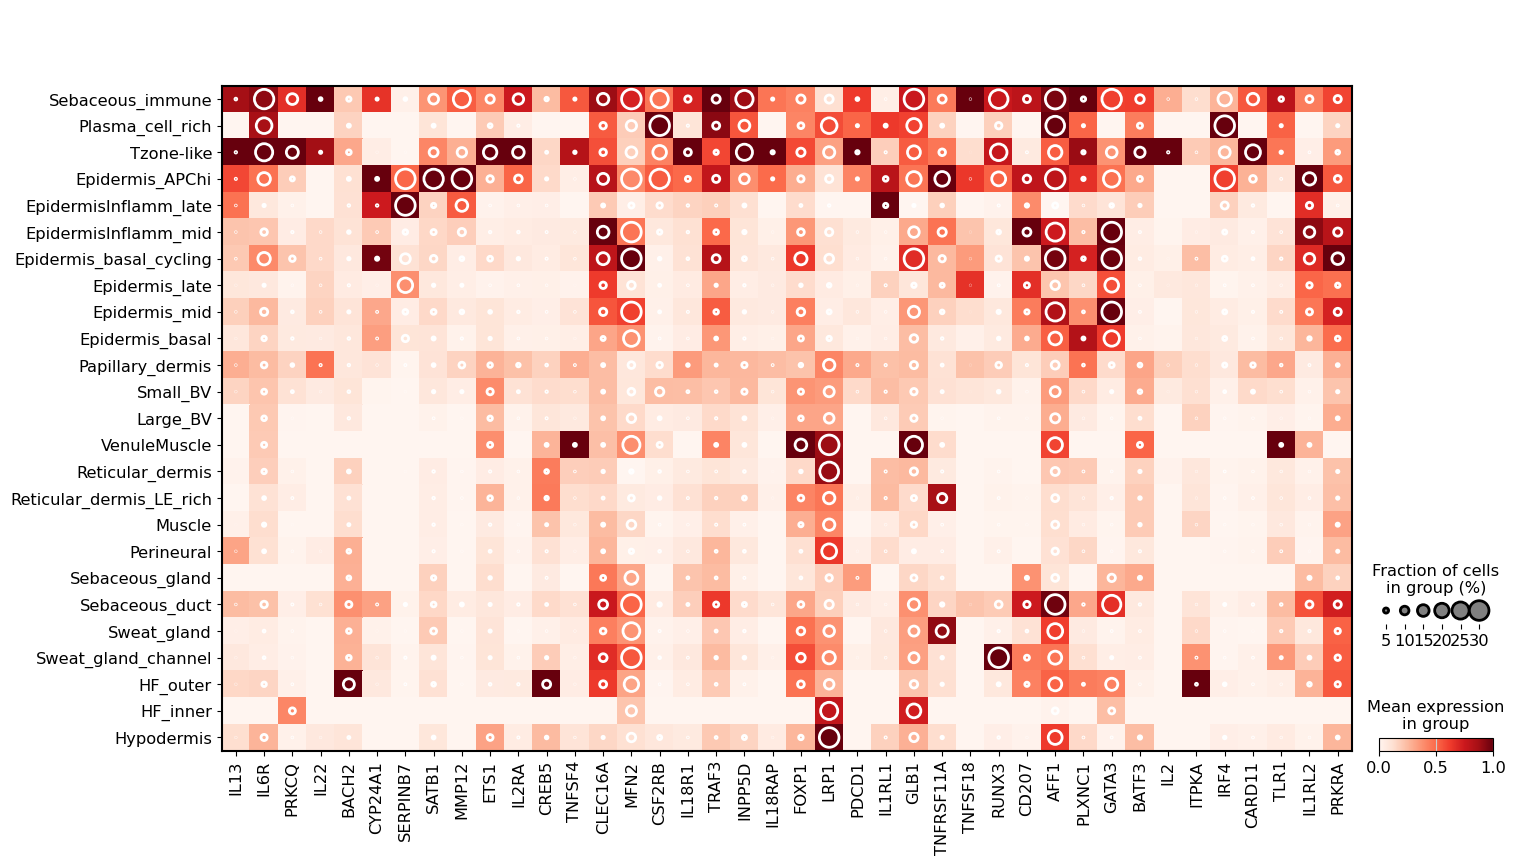

In [35]:

dp = sc.pl.DotPlot(
            adata_5k_ii, #[adata_5k_i.obs["Site_status_binary"]=="Lesional"],
            remove_markers(AD_GENES_OT)[:40],
            #swap_axes=True,
            groupby="niche19",
           vmax=1,
            #    colorbar_title='Mean expression\n(variance scaled)', 
         standard_scale="var",
           # save="5g_AD.pdf",
        ) 
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
                       dot_max=.3

                  )
dp.show()     
#dp.savefig("fig5/spatial_gwas_ad.pdf", dpi=300)       
    

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:731: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  

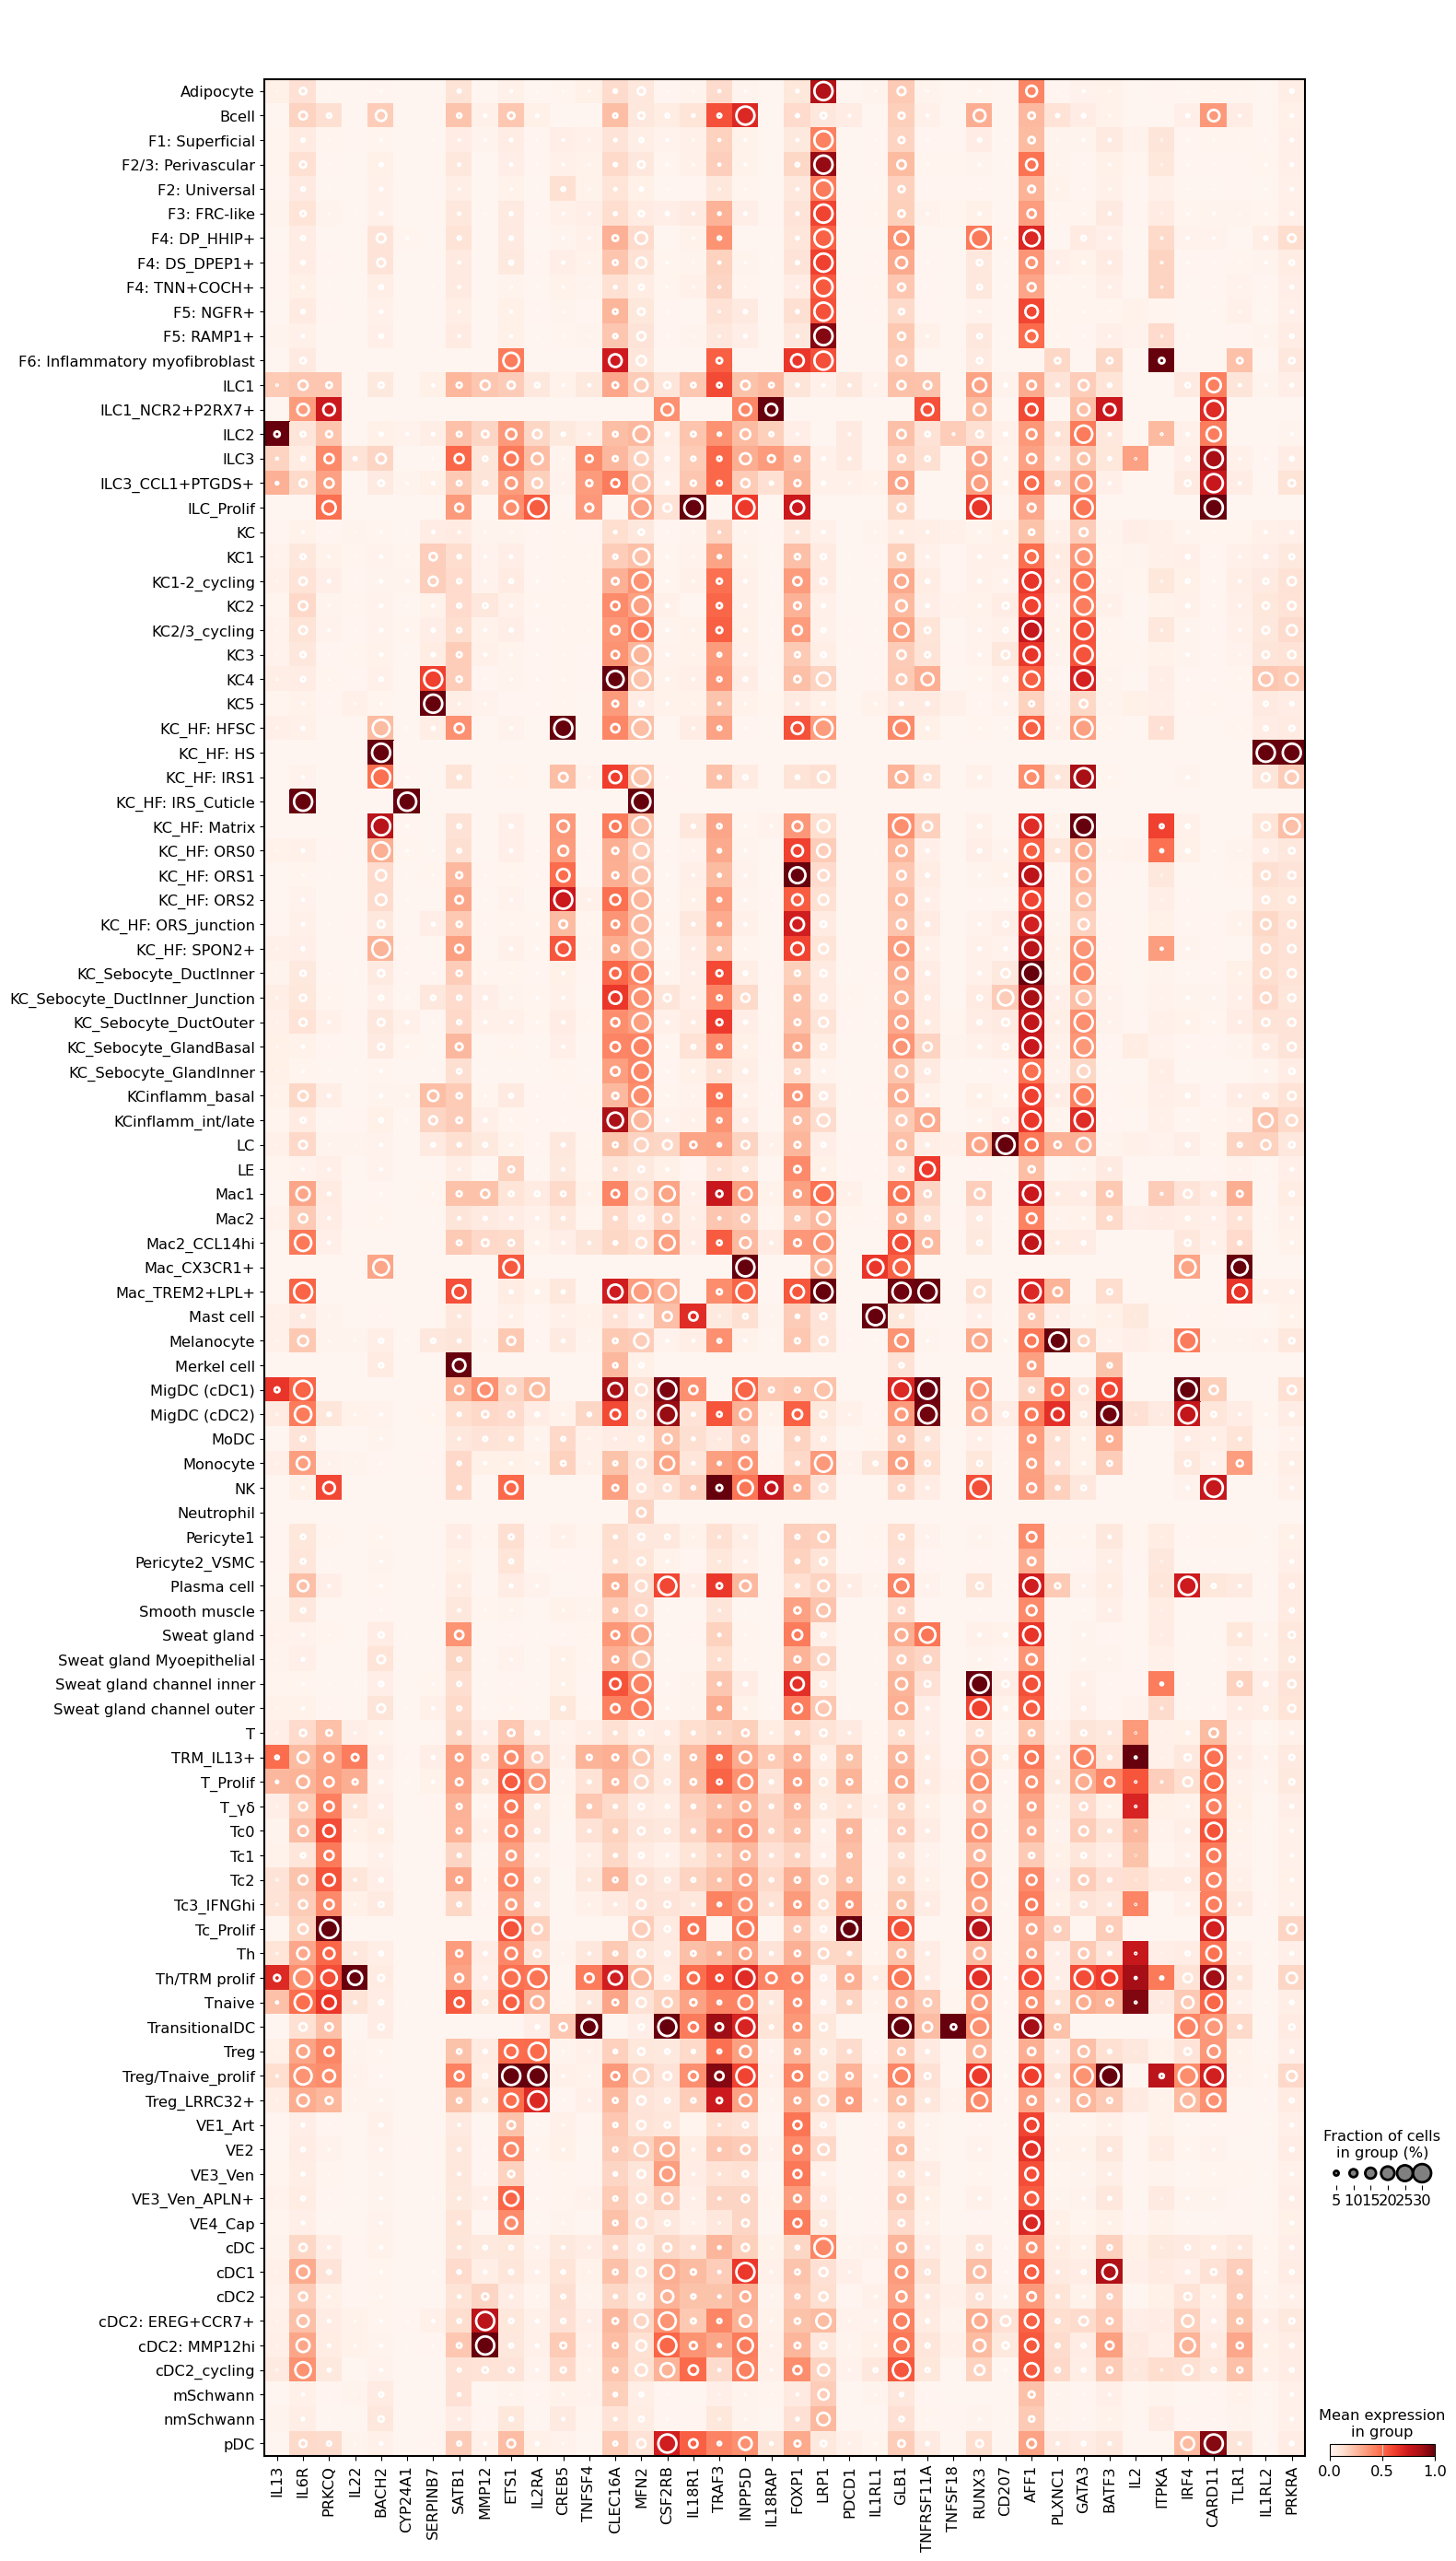

In [36]:
# for x in adata_5k_i.obs["Site_status_binary"].unique():
#     if x=="Lesional":
#       II  print(x)
#         adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status_binary"]==x]
#        # sc.pl.dotplot(
#     #     adata_5k_i,
#     #     remove_markers(AD_genes),
#     #     groupby="niche12",
#     #     standard_scale="var",
#     #     dendrogram=False,
#     #     dot_max=0.3
#     #         # categories_order=ORDER,

#     #     #vmax=1,
#     # #     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#     # #  'KC_Sebocyte_PPARG+_basal/outer',
#     # #  'KC_Sebocyte_PPARG+_basal_cycling',
#     # # ]
#     # ) 


dp = sc.pl.DotPlot(
            adata_5k_i,#[adata_5k_i.obs["Site_status_binary"]=="Lesional"],
            remove_markers(AD_GENES_OT)[:40],
            #swap_axes=True,
            groupby="lvl5_annotation",
           vmax=1,
            #    colorbar_title='Mean expression\n(variance scaled)', 
         standard_scale="var",
           # save="5g_AD.pdf",
        ) 
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
                       dot_max=.3

                  )
dp.show()   
#dp.savefig("fig5/suppfig9c_spatial_gwas_CELLTYPES_ad.pdf", dpi=300)       
    

In [37]:
# MONOGENIC_genes = [
#     "FLG", "SPINK5", "CDSN", "DSG1", "DSP", "CARD14",
#     "KIT", "PLCG2", "ADGRE2",
#     "WAS", "WIPF1", "ARPC1B", "DOCK8", "NCKAP1L", "CARMIL2", "STK4", "MSN",
#     "CARD11", "CARD14", "MALT1", "CARMIL2", "RFXANK",
#     "LIG4", "DCLRE1C", "RAG1", "RAG2", "ADA", "IL7RA", "IL2RG", "ZAP70",
#     "CHD7", "TBX1", "FOXP3", "TBX21", "IKZF1",
#     "JAK1", "STAT1", "STAT3", "STAT5B", "STAT6", "IL2RA", "IL4RA",
#     "TGFBR1", "TGFBR2", "ERBB2IP", "IL6ST", "IL6R", "ZNF341", "FOXP3", "TBX21",
#     "PGM3", "CARD11", "MALT1"
# ]
# dp = sc.pl.DotPlot(
#             adata_5k_i,#[adata_5k_i.obs["Site_status_binary"]=="Lesional"],
#             remove_markers(MONOGENIC_genes),
#             #swap_axes=True,
#             groupby="lvl5_annotation",
#           # vmax=.4,
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#        #  standard_scale="var",
#            # save="5g_AD.pdf",
#         ) 
# dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                        dot_max=.3

#                   )
# dp.show()   
# #dp.savefig(

In [38]:
# dp = sc.pl.DotPlot(
#             adata_5k_i,#[adata_5k_i.obs["Site_status_binary"]=="Lesional"],
#             remove_markers(MONOGENIC_genes),
#             #swap_axes=True,
#             groupby="lvl5_annotation",
#            vmax=1,
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#          standard_scale="var",
#            # save="5g_AD.pdf",
#         ) 
# dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                        dot_max=.5

#                   )
# dp.show()   
# #dp.savefig(

In [39]:
# MONOGENIC_genes = [
#     "FLG", "SPINK5", "CDSN", "DSG1", "DSP", "CARD14",
#     "KIT", "PLCG2", "ADGRE2",
#     "WAS", "WIPF1", "ARPC1B", "DOCK8", "NCKAP1L", "CARMIL2", "STK4", "MSN",
#     "CARD11", "CARD14", "MALT1", "CARMIL2", "RFXANK",
#     "LIG4", "DCLRE1C", "RAG1", "RAG2", "ADA", "IL7RA", "IL2RG", "ZAP70",
#     "CHD7", "TBX1", "FOXP3", "TBX21", "IKZF1",
#     "JAK1", "STAT1", "STAT3", "STAT5B", "STAT6", "IL2RA", "IL4RA",
#     "TGFBR1", "TGFBR2", "ERBB2IP", "IL6ST", "IL6R", "ZNF341", "FOXP3", "TBX21",
#     "PGM3", "CARD11", "MALT1"
# ]
# dp = sc.pl.DotPlot(
#             adata_5k_i,#[adata_5k_i.obs["Site_status_binary"]=="Lesional"],
#             remove_markers(MONOGENIC_genes),
#             #swap_axes=True,
#             groupby="niche19",
#            vmax=1,
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#          standard_scale="var",
#            # save="5g_AD.pdf",
#         ) 
# dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                        dot_max=.3

#                   )
# dp.show()   
# #dp.savefig(

In [40]:
# # for x in adata_5k_i.obs["Site_status_binary"].unique():
# #     if x=="Lesional":
# #         print(x)
# #         adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status_binary"]==x]
# #        # sc.pl.dotplot(
# #     #     adata_5k_i,
# #     #     remove_markers(AD_genes),
# #     #     groupby="niche12",
# #     #     standard_scale="var",
# #     #     dendrogram=False,
# #     #     dot_max=0.3
# #     #         # categories_order=ORDER,

# #     #     #vmax=1,
# #     # #     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
# #     # #  'KC_Sebocyte_PPARG+_basal/outer',
# #     # #  'KC_Sebocyte_PPARG+_basal_cycling',
# #     # # ]
# #     # ) 


# dp = sc.pl.DotPlot(
#             adata_5k_i[adata_5k_i.obs["Site_status_binary"]=="Lesional"],
#             remove_markers(AD_GENES_OT),
#             #swap_axes=True,
#             groupby="baseline_severity",
#            vmax=1,
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#         # standard_scale="var",
#            # save="5g_AD.pdf",
#         ) 
# dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                        dot_max=.3

#                   )
# dp.show()
# #dp.savefig("fig5/spatial_gwas_ad_celltype.pdf", dpi=300)       
    

In [41]:
4

4

In [42]:
CONTROL_SIZE = 1000 #
N_BINS=25  
adata_5k_i = sc.tl.score_genes(adata_5k_i, remove_markers(AD_GENES_OT), ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="ad_gwas")



In [43]:
adata_5k_i.obs["info_id6"].value_counts()

info_id6
3D_BK25_week12-D2                 40046
BK39_Week 12                      32058
BK30_Day 14                       30438
BK49_Past Lesional                27387
BK23_Lesional Baseline            24432
3D_BK22_Lesional_baseline-B2      24315
3D_BK22_Lesional_baseline-D1      23777
3D_BK22_Lesional_baseline-A1      23013
3D_BK22_Lesional_baseline-C2      22069
BK22_Lesional Baseline            21566
3D_BK22_Lesional_baseline-D2      20714
3D_BK22_Lesional_baseline-B1      20444
3D_BK25_week12-A2                 20084
3D_BK25_week12-C2                 19688
3D_BK22_Lesional_baseline-A2      19147
BK46_Never Lesional               18754
BK30_Week 12                      18678
BK46_Past Lesional                18353
BK18_Lesional Baseline            17731
3D_BK25_week12-B2                 17717
BK23_Non-lesional Baseline        17684
3D_BK25_week12-D1orE1b            17173
BK30_Non-lesional Baseline        16910
3D_BK25_week12-D1orE1a            16887
3D_BK25_week12-B1              

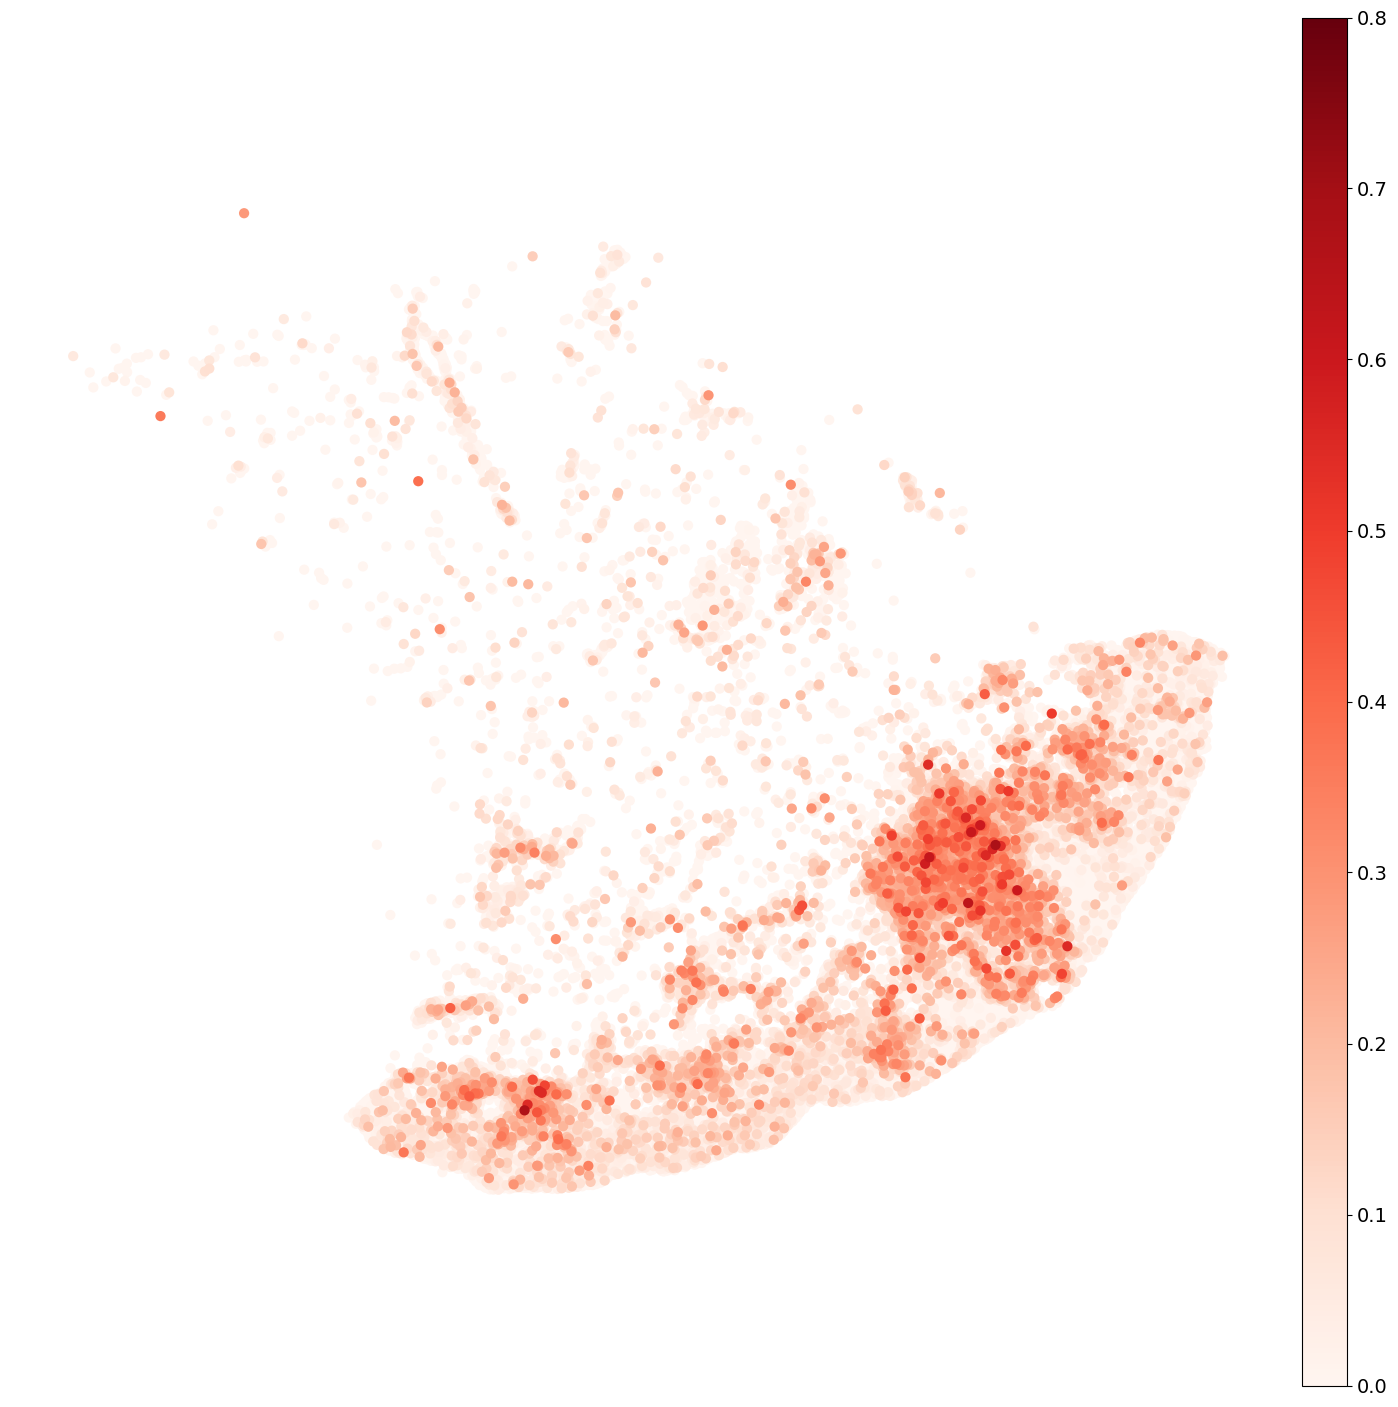

In [44]:
adata_5k_ii=adata_5k_i[adata_5k_i.obs["info_id6"]=="BK22_Lesional Baseline"]
sc.pl.spatial(adata_5k_ii,
              spot_size=40,
              color="ad_gwas", 
             cmap="Reds", vmin=0,vmax=VMAX_PLOTS,
             title='',
 save=f"supp5_AD_spatial1_OTAR{TOPN}.pdf", 
             )

In [45]:
# adata_5k_ii=adata_5k_i[adata_5k_i.obs["info_id6"]=="BK22_Lesional Baseline"]
# sc.pl.spatial(adata_5k_ii,
#               spot_size=50,
#               color="ad_gwas", 
#              cmap="Reds", vmin=0,vmax=1,
#               #standard_scale='var',
#              title='',
#                  #       save="5g_AD_spatial1.pdf",
 
#              )

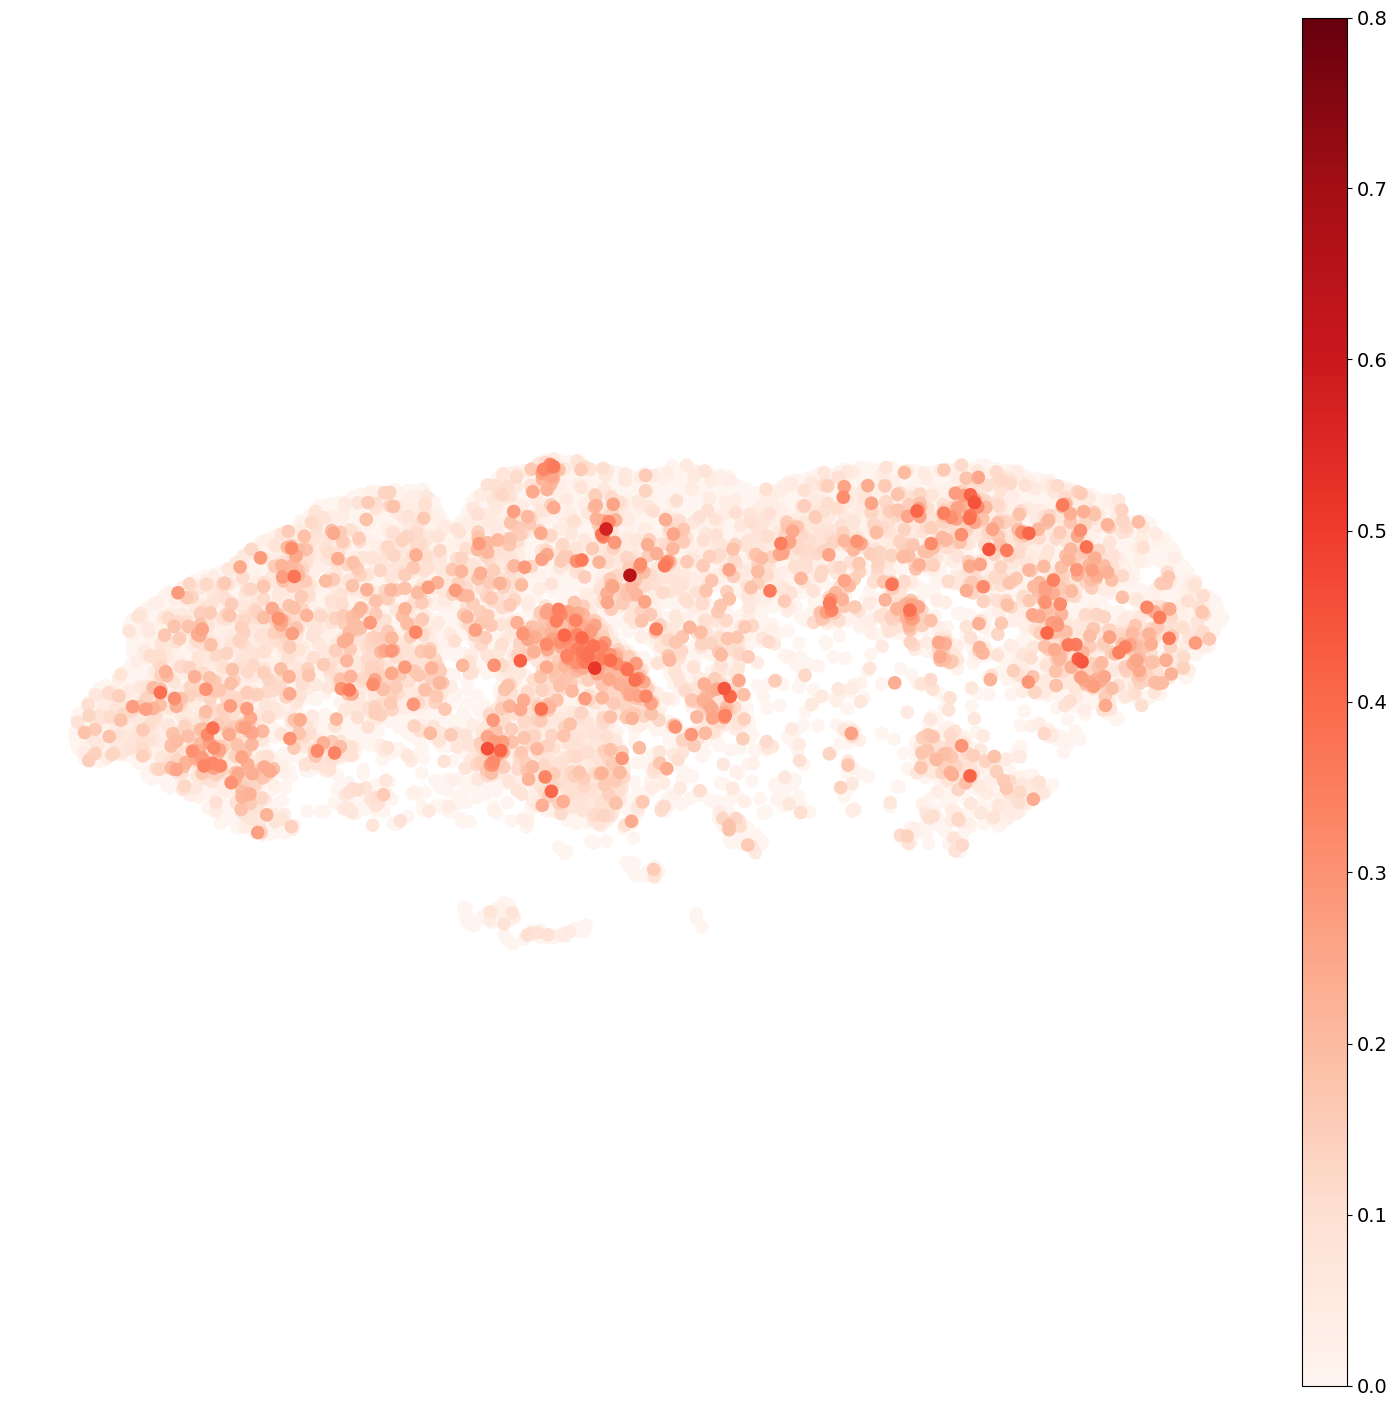

In [46]:
adata_5k_ii=adata_5k_i[adata_5k_i.obs["info_id6"]=="BK39_Lesional Baseline"]
sc.pl.spatial(adata_5k_ii,
              spot_size=40,
              color="ad_gwas", 
             cmap="Reds", vmin=0,vmax=VMAX_PLOTS,
             title='',
                                     save=f"supp5_AD_spatial2_OTAR{TOPN}.pdf",

             )

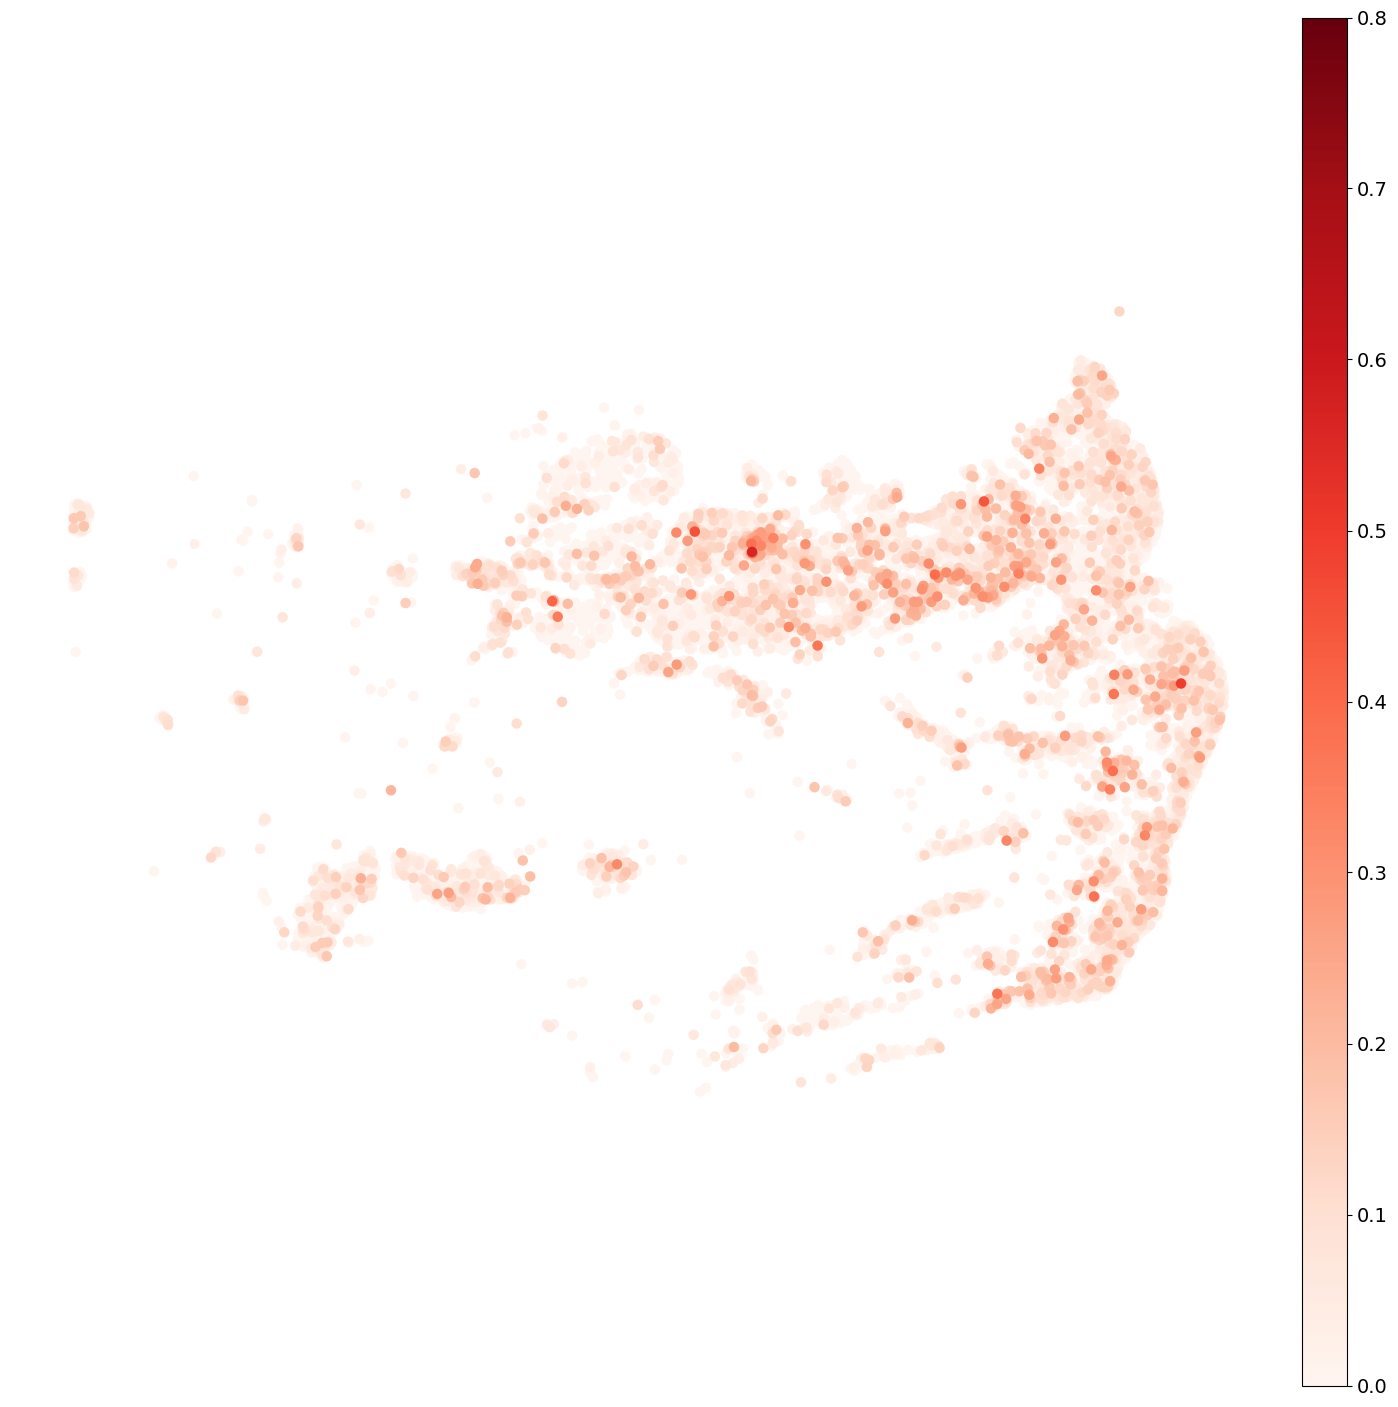

In [47]:

adata_5k_ii=adata_5k_i[adata_5k_i.obs["info_id6"].str.startswith("BK27_We")]
sc.pl.spatial(adata_5k_ii,
              spot_size=40,
              color="ad_gwas", 
             cmap="Reds", vmin=0,vmax=VMAX_PLOTS,
                                                   save=f"supp5_AD_spatial3_OTAR{TOPN}.pdf",

             title='')



In [51]:
TOPN

100

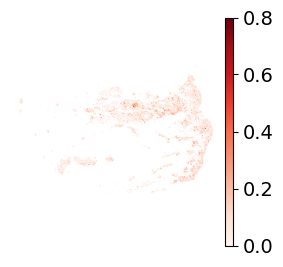

In [52]:
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(3,3),
                              vector_friendly=True
                             )
adata_5k_ii=adata_5k_i[adata_5k_i.obs["info_id6"].str.startswith("BK27_We")]
sc.pl.spatial(adata_5k_ii,
              spot_size=20,
              color="ad_gwas", 
             cmap="Reds", vmin=0, title='', vmax=VMAX_PLOTS,
                                                save=f"supp{TOPN}_legend_gwas.pdf",
)
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18),
                              vector_friendly=True
                             )

In [48]:
# stop

NameError: name 'stop' is not defined

In [ ]:
# adata_5k_ii=adata_5k_i[adata_5k_i.obs["info_id6"]=="BK27_Lesional Baseline"]
# sc.pl.spatial(adata_5k_ii,
#               spot_size=40,
#               color="ad_gwas", 
#              cmap="Reds", vmin=0,vmax=0.2,
#              title='')

In [ ]:
# adata_5k_ii=adata_5k_i[adata_5k_i.obs["info_id6"].str.startswith("BK27_We")]
# sc.pl.spatial(adata_5k_ii,
#               spot_size=30,
#               color="ad_gwas", 
#              cmap="Reds", vmin=0,vmax=0.2,
#              title='',
#                           #           save="5g_AD_spatial3.pdf",
# )

In [ ]:
import pickle

# Path to your pickle file
path = "/nfs/team298/ls34/niche_colors.pkl"

# Load the dictionary
with open(path, "rb") as f:
    colors_new2 = pickle.load(f)

In [ ]:
adata_5k_i.obs["niche19"].value_counts()

In [ ]:
# Count cells per niche
counts = adata_5k_i.obs["niche19"].value_counts()

# Keep only niches with >=10 cells
valid_niches = counts[counts >= 10].index

# Subset AnnData
adata_5k_i = adata_5k_i[adata_5k_i.obs["niche19"].isin(valid_niches)].copy()

# Clean up unused categories
adata_5k_i.obs["niche19"] = adata_5k_i.obs["niche19"].cat.remove_unused_categories()



In [ ]:

# Extract the obs as DataFrame
df = adata_5k_i.obs[["niche19", "ad_gwas"]].copy()

# Compute mean per niche and sort descending
order = (
    df.groupby("niche19")["ad_gwas"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# Make violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df,
    x="niche19",
    y="ad_gwas",
    order=order,
    inner="box",   # optional: show a mini boxplot inside
    cut=0,         # don’t extend violins beyond observed data
    scale="width" , # makes widths comparable
    palette=colors_new2  
)

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("AD GWAS score")
plt.title("")
plt.tight_layout()
plt.savefig(f"fig5/9b_OT_ad_violin_OT_{TOPN}.pdf", dpi=300, bbox_inches="tight")

plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract the obs as DataFrame
df = adata_5k_i.obs[["lvl5_annotation", "ad_gwas"]].copy()

# Compute mean per niche and sort descending
order = (
    df.groupby("lvl5_annotation")["ad_gwas"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# Make violin plot
plt.figure(figsize=(20, 5))
sns.violinplot(
    data=df,
    x="lvl5_annotation",
    y="ad_gwas",
    order=order,
    inner="box",   # optional: show a mini boxplot inside
    cut=0,         # don’t extend violins beyond observed data
    scale="width"  # makes widths comparable
)

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("AD GWAS score")
plt.title("Violin plot of AD GWAS module score by niche (sorted)")
plt.tight_layout()
#plt.savefig("fig5/supp9b_ad_violin_celltype.pdf", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd


# adata_5k_ii=adata_5k_i[adata_5k_i.obs["lvl5_annotation"]=="TRM_IL13+"]
# df = adata_5k_ii.obs[["niche19", "ad_gwas"]].copy()

# # Compute mean per niche and sort descending
# order = (
#     df.groupby("niche19")["ad_gwas"]
#     .mean()
#     .sort_values(ascending=False)
#     .index
# )

# # Make violin plot
# plt.figure(figsize=(10, 5))
# sns.violinplot(
#     data=df,
#     x="niche19",
#     y="ad_gwas",
#     order=order,
#     inner="box",   # optional: show a mini boxplot inside
#     cut=0,         # don’t extend violins beyond observed data
#     scale="width"  # makes widths comparable
# )

# plt.xticks(rotation=90)
# plt.xlabel("")
# plt.ylabel("AD GWAS score")
# plt.title("Violin plot of AD GWAS module score by niche (sorted)")
# plt.tight_layout()
# plt.show()

In [ ]:
#STOP

In [ ]:
#stop

In [ ]:
# stop

In [ ]:
# MIN_SCORE

# psoriasis GWAS

In [ ]:
import pandas as pd

# Load the TSV file
df = pd.read_csv("ot_psoriasis.tsv", sep="\t")

df_filtered = df[df["globalScore"] >= MIN_SCORE]

# (Optional) save to new file
#df_filtered.to_csv("ot_ad.tsv", sep="\t", index=False)
df_filtered.shape

psoriasis_genes = df_filtered["symbol"].to_list()

len(remove_markers(psoriasis_genes))

if USE_TOPN:
    df_filtered=df[df["globalScore"] >= 0.01]
    psoriasis_genes = df_filtered["symbol"].to_list()
    psoriasis_genes=psoriasis_genes[:TOPN]

In [ ]:
adata_5k_i=adata_5k[adata_5k.obs["disease_overall"]=="Psoriasis"]
adata_5k_i.shape

In [ ]:
adata_5k_i.obs['Site_status'].value_counts()

In [ ]:
adata_5k_i=adata_5k_i[adata_5k_i.obs["niche19"]!="Nonspecific/folded"]
adata_5k_i=adata_5k_i[~adata_5k_i.obs["niche19"].isna()]
adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status"]=="Lesional"]



# Get counts per niche
counts = adata_5k_ii.obs["niche19"].value_counts()

# Identify categories with at least 10 cells
valid_niches = counts[counts > 10].index

# Subset AnnData to only those categories
adata_5k_ii = adata_5k_ii[adata_5k_ii.obs["niche19"].isin(valid_niches)].copy()
adata_5k_ii.obs["niche19"].value_counts()

In [ ]:
# adata_5k_i=adata_5k_i[adata_5k_i.obs["niche19"]!="Nonspecific/folded"]
# adata_5k_i=adata_5k_i[~adata_5k_i.obs["niche19"].isna()]
# adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status"]=="Lesional"]



# # Get counts per niche
# counts = adata_5k_ii.obs["niche19"].value_counts()

# # Identify categories with at least 10 cells
# valid_niches = counts[counts > 10].index

# # Subset AnnData to only those categories
# adata_5k_ii = adata_5k_ii[adata_5k_ii.obs["niche19"].isin(valid_niches)].copy()
# adata_5k_ii.obs["niche19"].value_counts()

In [ ]:
# desired_order = [
#     'Sebaceous_immune', 'Epidermis_basal_immune',
#     'Plasma_cell_niche', 'Tzone-like',
#     'Epidermis_APChi', 'Epidermis_mid2',
#     'Epidermis_basal', 'Epidermis_mid1',
#     'Epidermis_late', 'Papillary_dermis',
#     'Small_BV', 'Large_BV',
#     'Reticular_dermis', 'Reticular_dermis_LErich',
#     'Muscle', 'Perineural',
#     'Sebaceous_gland',
#     'Sweat_gland', 'Sweat_gland_channel',
#     'HF', 'OuterHF',
#     'Perifollicular_VE', 'Hypodermis'
# ]

count=0
for x in adata_5k_i.obs["niche19"].unique():
    if x not in desired_order:
        print(x)
        count = count+1
if count != 0: 
    stop


In [ ]:
# make sure niche12 is categorical and ordered
adata_5k_ii.obs["niche19"] = pd.Categorical(
    adata_5k_ii.obs["niche19"],
    categories=desired_order,
    ordered=True
)



In [ ]:
adata_5k_ii

In [ ]:
# Get counts per niche
counts = adata_5k_ii.obs["niche19"].value_counts()

# Identify categories with at least 10 cells
valid_niches = counts[counts > 10].index

# Subset AnnData to only those categories
adata_5k_ii = adata_5k_ii[adata_5k_ii.obs["niche19"].isin(valid_niches)].copy()
adata_5k_ii.obs["niche19"].value_counts()

In [ ]:
dp = sc.pl.DotPlot(
        adata_5k_ii,
        remove_markers(psoriasis_genes)[:40],
        #swap_axes=True,
        groupby="niche19",
       vmax=1,
        #    colorbar_title='Mean expression\n(variance scaled)', 
     standard_scale="var",

    ) 
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
                   dot_max=.3

              )

#dp.savefig("fig5/supp9a_spatial_gwas_pso.pdf", dpi=300)       
dp.show()

In [ ]:
dp = sc.pl.DotPlot(
        adata_5k_ii,
        remove_markers(psoriasis_genes)[:40],
        #swap_axes=True,
        groupby="lvl5_annotation",
       vmax=1,
        #    colorbar_title='Mean expression\n(variance scaled)', 
     standard_scale="var",

    ) 
dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
                   dot_max=.3

              )

#dp.savefig("fig5/supp9c_spatial_gwas_pso_celltype.pdf", dpi=300)       
dp.show()

In [ ]:
sc.pl.DotPlot(
            adata_5k_ii,
            remove_markers(psoriasis_genes)[:40],
            #swap_axes=True,
            groupby="niche19",
           vmax=1,
            #    colorbar_title='Mean expression\n(variance scaled)', 
         standard_scale="var",
        ) \
            .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
                       dot_max=.3

                  )\
        .show()

        
    

In [ ]:
sc.pl.DotPlot(
            adata_5k_ii,
            remove_markers(psoriasis_genes)[:40],
            #swap_axes=True,
            groupby="niche19",
           vmax=1,
            #    colorbar_title='Mean expression\n(variance scaled)', 
         standard_scale="var",
        ) \
            .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
                       dot_max=.3

                  )\
        .show()

        
    

In [ ]:
# dp = sc.pl.DotPlot(
#             adata_5k_ii[adata_5k_ii.obs["Site_status_binary"]=="Lesional"],
#             remove_markers(psoriasis_genes)[:40],
#             #swap_axes=True,
#             groupby="lvl5_annotation",
#            vmax=.6,
#             #    colorbar_title='Mean expression\n(variance scaled)', 
#          standard_scale="var",
#            # save="5g_AD.pdf",
#         ) 
# dp = dp.style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                        dot_max=.3

#                   )
# #dp.show()   
# #dp.savefig("fig5/suppfig9c_spatial_gwas_CELLTYPES_PSO.pdf", dpi=300)       
# dp.show()   

In [ ]:
CONTROL_SIZE = 1000 #
N_BINS=25  
adata_5k_ii = sc.tl.score_genes(adata_5k_ii, remove_markers(psoriasis_genes), ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="pso_gwas")



In [ ]:
# adata_5k_i.obs["info_id6"].value_counts()

In [ ]:
adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["info_id6"]=='Lesional_CE3-SKI-24-FO-1-S22-A1']
sc.pl.spatial(adata_5k_iii,
              spot_size=20,
              color="pso_gwas", 
             cmap="Reds", vmin=0,
             title='',  vmax=VMAX_PLOTS,
               save=f"supp5_PSO_spatial1_OTAR{TOPN}.pdf",
                                   #  save="5g_psoriasis_spatial1.pdf",
)

In [ ]:
adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["info_id6"]=='Lesional_CE4-SKI-27-FO-4-S22-A2']
sc.pl.spatial(adata_5k_iii,
              spot_size=20,
              color="pso_gwas", 
             cmap="Reds", vmin=0, title='', vmax=VMAX_PLOTS,
               save=f"supp5_PSO_spatial2_OTAR{TOPN}.pdf",
                                          #        save="5g_psoriasis_spatial2.pdf",
)

In [ ]:
df = adata_5k_ii.obs[["niche19", "pso_gwas"]].copy()

# Compute mean per niche and sort descending
order = (
    df.groupby("niche19")["pso_gwas"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# Make violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df,
    x="niche19",
    y="pso_gwas",
    order=order,
    inner="box",   # optional: show a mini boxplot inside
    cut=0,         # don’t extend violins beyond observed data
    scale="width" , # makes widths comparable
    palette=colors_new2  
)

plt.xticks(rotation=90)
plt.xlabel("Niche")
plt.ylabel("PSO GWAS score")
plt.title("")
plt.tight_layout()
plt.savefig(f"fig5/supp9b_pso_violin_OT_{TOPN}.pdf", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:

# Extract the obs as DataFrame
df = adata_5k_ii.obs[["lvl5_annotation", "pso_gwas"]].copy()

# Compute mean per niche and sort descending
order = (
    df.groupby("lvl5_annotation")["pso_gwas"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# Make violin plot
plt.figure(figsize=(20, 5))
sns.violinplot(
    data=df,
    x="lvl5_annotation",
    y="pso_gwas",
    order=order,
    inner="box",   # optional: show a mini boxplot inside
    cut=0,         # don’t extend violins beyond observed data
    scale="width"  # makes widths comparable
)

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("PSO GWAS score")
plt.title("")
plt.tight_layout()
#
plt.show()

In [ ]:
# stop

In [ ]:
 # stop

# AKOYA

In [ ]:
import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
%matplotlib inline
sc.settings.verbosity = 0


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig5"
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18),
                              vector_friendly=True
                             )

In [ ]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_ii.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_ii.var_names]
    return LIST


In [ ]:
# adata_ii=sc.read_h5ad('/lustre/scratch126/cellgen/lotfollahi/ls34/nemo/adata_all.h5ad.clustered.clustered10.good.4only')
adata_ii=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_nemofinal.h5ad.plots')
adata_ii=adata_ii[adata_ii.obs["fig8_mapping"]=="sept25"].copy()
adata_ii = adata_ii[~adata_ii.obs["info_id6"].str.startswith("CE")].copy()
adata_ii.shape

In [ ]:
adata_ii.obs["info_id6"].value_counts()

In [ ]:
sc.pp.normalize_total(adata_ii, target_sum=1e4)
sc.pp.log1p(adata_ii)

In [ ]:
import pandas as pd

# Load the TSV file
df = pd.read_csv("ot_ad.tsv", sep="\t")

# Filter out rows where globalScore < 0.8
df_filtered = df[df["globalScore"] >= MIN_SCORE]

df_filtered.shape

AD_GENES_OT = df_filtered["symbol"].to_list()
len(remove_markers(AD_GENES_OT))

if USE_TOPN:
    df_filtered=df[df["globalScore"] >= 0.01]
    AD_GENES_OT = df_filtered["symbol"].to_list()
    AD_GENES_OT = AD_GENES_OT[:TOPN]

In [ ]:
adata_ii.obs.info_id6.value_counts()

In [ ]:
CONTROL_SIZE = 1000 #
N_BINS=25  
adata_ii = sc.tl.score_genes(adata_ii, remove_markers(AD_GENES_OT), ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="ad_gwas_ot")


In [ ]:
# # select only lesional sections

# adata_ii = adata_ii[~adata_ii.obs["info_id6"].str.startswith("BK22")]
# adata_ii = adata_ii[~adata_ii.obs["info_id6"].str.startswith("BK30")]
# adata_ii = adata_ii[~adata_ii.obs["info_id6"].str.startswith("BK23")]


In [ ]:
for slide_id in sorted(["BK21-SKI-27-FO1-S11-C1", "BK51-SKI-27-FO-2-S9-B2",
                                       "BK39-SKI-27-FO-1-S8-D2", 
                        "BK27-SKI-27-FO-5-S9-D1"
                        "BK27-SKI-27-FO-1-S6-C1"

                       ]):
    adata_iii=adata_ii[adata_ii.obs["info_id6"]==slide_id]

    sc.pl.spatial(adata_iii,
              spot_size=50,
              color="ad_gwas_ot", 
             cmap="Reds", vmin=0,
             title='',  vmax=VMAX_PLOTS,
                 # save=f"5d_{slide_id}_NEMOscores.pdf"
                                    # save="5g_psoriasis_spatial1.pdf",
    )

In [ ]:
import pickle

# Path to your pickle file
path = "/nfs/team298/ls34/niche_colors.pkl"

# Load the dictionary
with open(path, "rb") as f:
    colors_new2 = pickle.load(f)

In [ ]:
plt.figure(figsize=(6, 10))  # Taller since we’re now vertical categories

df = adata_ii.obs[["provisional", "ad_gwas_ot"]].copy()

# Compute mean per niche and sort descending
order = (
    df.groupby("provisional")["ad_gwas_ot"]
    .mean()
    .sort_values(ascending=False)
    .index
)

sns.violinplot(
    data=df,
    x="ad_gwas_ot",               # Swap x and y
    y="provisional",           # Category now on y-axis
    order=order,               # Still ordered by mean
    inner="box",
    cut=0,
    scale="width",
    palette=colors_new2
)

plt.ylabel("Niche")
plt.xlabel("AD GWAS score")
plt.title("")
plt.tight_layout()
plt.savefig("fig5/supp9e_NEMO_violin_horizontal_OT.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
1

In [ ]:
# import pandas as pd

# # Load the TSV file
# df = pd.read_csv("ot_ad.tsv", sep="\t")

# # Filter out rows where globalScore < 0.8
# df_filtered = df[df["globalScore"] >= MIN_SCORE]

# df_filtered.shape

# AD_GENES_OT = df_filtered["symbol"].to_list()
# len(remove_markers(AD_GENES_OT))

# if USE_TOPN:
#     df_filtered=df[df["globalScore"] >= 0.01]
#     AD_GENES_OT = df_filtered["symbol"].to_list()
#     AD_GENES_OT = AD_GENES_OT[:TOPN]
    
    

# plt.figure(figsize=(6, 10))  # Taller since we’re now vertical categories

# df = adata_ii.obs[["provisional", "ad_gwas_ot"]].copy()

# # Compute mean per niche and sort descending
# order = (
#     df.groupby("provisional")["ad_gwas_ot"]
#     .mean()
#     .sort_values(ascending=False)
#     .index
# )

# sns.violinplot(
#     data=df,
#     x="ad_gwas_ot",               # Swap x and y
#     y="provisional",           # Category now on y-axis
#     order=order,               # Still ordered by mean
#     inner="box",
#     cut=0,
#     scale="width",
#     palette=colors_new2
# )

# plt.ylabel("Niche")
# plt.xlabel("AD GWAS score")
# plt.title("")
# plt.tight_layout()
# plt.savefig("fig5/supp9e_NEMO_violin_horizontal_OT.pdf", dpi=300, bbox_inches="tight")
# plt.show()